<a href="https://colab.research.google.com/github/Grigorus/Study_Stepik/blob/main/%D0%A3%D0%A0%D0%90!!!_75_!!%22%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%93%D1%80%D0%B8%D0%B3%D0%BE%D1%80%D1%83%D1%81%D1%8C_%D0%95_%D0%9D_%22%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F_%D0%BE%D0%BF%D1%8C%D1%8F%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BF%D0%BE_%D1%80%D0%B5%D1%87%D0%B8%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files #load files
from tensorflow.keras import utils #for to_categorical
import os #for folders and files
import librosa #for mining audio parameters
import numpy as np #arrays
import matplotlib.pyplot as plt #for diagrams

%matplotlib inline 
from tensorflow.keras.optimizers import Adam, RMSprop  #optimisator for set step of learning
from tensorflow.keras.models import Sequential, Model # keras formats
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, Reshape #layers
from sklearn.model_selection import train_test_split #slit learning and test data
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler #normalisation of data
from keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#disc mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DiplomeDrunkBase = 'drunk_animal_word sober_animal_world'.split()

In [ ]:
#Функция параметризации аудио
def get_features(y, sr):
  #Получаем различные параметры аудио
  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) #Частота цветности (по умолчанию 12 баков цветности)
  mfcc = librosa.feature.mfcc(y=y, sr=sr) #Мел спектральные коэффициенты (по умолчанию 20)
  rmse = np.mean(librosa.feature.rms(y=y)) #Среднеквадратичная амплитуда
  spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)) #среднее спектральныго центроида
  spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)) #среднее ширины полосы частот
  rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)) #среднее спектрального спада частоты
  zcr = np.mean(librosa.feature.zero_crossing_rate(y)) #среднее частота пересечения нуля звукового временного ряда
  
  
  #Добавляем все параметры в один список
  out = [] # создаем пустой список
  out.append(rmse) #  добавляем среднеквадратичную амплитуду
  out.append(spec_cent) #добавляем спектральный центроид
  out.append(spec_bw) # добавляем ширину полосы частот
  out.append(rolloff) # добавляем спектральный спад частоты
  out.append(zcr) # добавляем пересечение нуля
  
  #добавляем среднее всех Мел спектральных коэффициентов (20 значений)
  #for e in mfcc:
  #out2.append(np.mean(e))

  #добавляем среднее всех Частот цветности (12 значений)
  #for e in chroma_stft:
  #out3.append(np.mean(e))
  
  #Возвращаем получившийся список размерностью (37,)
  return out, chroma_stft, mfcc

In [ ]:
import time #Для подсчёта времени на обработку одного жанра

#Формируем обучающую выборку
#Создаём пустые листы
X_train = []
Y_train = []
X2_train = []
X3_train = []

#Запоминаем время старта формирования выборки
curr_time = time.time()

#Проходим по всем жарнам
for i in range(len(DiplomeDrunkBase)):
  g = DiplomeDrunkBase[i] #Берём текущее состояние
  #Проходим по файлам папки, соответствующей текущему состоянию
  for filename in os.listdir(f'/content/drive/My Drive/pitonism/DiplomeDrunkBase/{g}'):
    #Получаем название голоса
    songname = f'/content/drive/My Drive/pitonism/DiplomeDrunkBase/{g}/{filename}'
    #Загружаем в y аудиосигнал
    #Используем первые N секунд аудио
    print (songname)
    
    y, sr = librosa.load(songname, mono=True)
    
    for j in range (int(len(y)//sr-4)):   

     #Превращаем сигнал в параметризованные данные
     #out, chroma_stft, mfcc = get_features(y, sr)
     out, chroma_stft, mfcc = get_features(y[j*sr:(j+4)*sr], sr)
     #Добавляем строку в X_train
     X_train.append(out)
     X2_train.append(chroma_stft)
     X3_train.append(mfcc)
     #Добавляем в Y_train номер жанра в формате ohe
     Y_train.append(utils.to_categorical(i, len(DiplomeDrunkBase)))

  #Выводим информацию о готовности обработки базы
  print("Состояние ", g, " готов -> ", round(time.time() - curr_time), "c", sep="")
  curr_time = time.time()

#Превращаем обучающую выборку на numpy массивы
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X2_train = np.array(X2_train)
X3_train = np.array(X3_train)
###########
print (X_train.shape) 
print (X2_train.shape)
print (X3_train.shape)
print (Y_train.shape)

/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (50).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (1).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (2).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (3).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (4).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (5).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (6).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (7).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (8).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase/drunk_animal_word/drunk_animal_world (9).m4a
/content/drive/My Drive/pitonism/DiplomeDrunkBase

In [ ]:
#квадрат значений
X_train_sqr = np.array([[t**2 for t in x] for x in X_train])
X_test_sqr = np.array([[t**2 for t in x] for x in x_test])
#квадратный корнь из абсолютных значений 
X_train_sqrt = np.array([[abs(t)**0.5 for t in x] for x in X_train])
X_test_sqrt = np.array([[abs(t)**0.5 for t in x] for x in X_test])
#1/t
X_train_inv = np.array([[t**(-1) for t in x] for x in X_train])
X_test_inv = np.array([[t**(-1) for t in x] for x in X_test])
#2 в степени t
X_train_exp = np.array([[2**t for t in x] for x in X_train])
X_test_exp = np.array([[2**t for t in x] for x in X_test])
#объединяем все массивы(Функция hstack() соединяет массивы по горизонтали)
X_train_2 = np.hstack([X_train, X_train_sqr, X_train_sqrt, X_train_inv, X_train_exp])
X_test_2 = np.hstack([X_test, X_test_sqr, X_test_sqrt, X_test_inv, X_test_exp])

print(X_train_2.shape)
print(X_test_2.shape)

In [ ]:
#Сохраним наши массивы данных
np.save('/content/drive/My Drive/pitonism/DiplomeDrunkBase/X_train.npy', X_train)
np.save('/content/drive/My Drive/pitonism/DiplomeDrunkBase/X2_train.npy', X2_train)
np.save('/content/drive/My Drive/pitonism/DiplomeDrunkBase/X3_train.npy', X3_train)
np.save('/content/drive/My Drive/pitonism/DiplomeDrunkBase/Y_train.npy', Y_train)

In [ ]:
#Загрузим данные, если надо
X_train = np.load('/content/drive/My Drive/pitonism/DiplomeDrunkBase/X_train.npy')
X2_train = np.load('/content/drive/My Drive/pitonism/DiplomeDrunkBase/X2_train.npy')
X3_train = np.load('/content/drive/My Drive/pitonism/DiplomeDrunkBase/X3_train.npy')
Y_train = np.load('/content/drive/My Drive/pitonism/DiplomeDrunkBase/Y_train.npy')

In [ ]:
#ФОРМИРУЕМ 
y_train_class = np.argmax(Y_train, axis=1)
print(y_train_class)

[0 0 0 ... 1 1 1]


In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_train, y_train_class, test_size=0.1)
X2_train1, X2_test1 = train_test_split(X2_train, test_size=0.1)
X3_train1, X3_test1 = train_test_split(X3_train, test_size=0.1)

In [ ]:
a = 1750

In [ ]:
X_train1 = X_train[0:a]
X2_train1 = X2_train[0:a]
X3_train1 = X3_train[0:a]
X_test1 = X_train[a+5:]
X2_test1 = X2_train[a+5:]
X3_test1 = X3_train[a+5:]
Y_test1 = Y_train[a+5:]
Y_train1 = Y_train[:a]

In [ ]:
print(X_test1.shape)
print(X_train1.shape)
print(X2_test1.shape)
print(X2_train1.shape)
print(X3_test1.shape)
print(X3_train1.shape)
print(Y_test1.shape)
print(Y_train1.shape)
X4_test1 = X3_test1
print(X4_test1.shape)

(257, 5)
(2312, 5)
(257, 12, 173)
(2312, 12, 173)
(257, 20, 173)
(2312, 20, 173)
(257,)
(2312,)
(257, 20, 173)


### НОРМИРУЕМ НАШИ ДАННЫЕ

In [ ]:
# к двумерным массивам применяем StandartScaller
scaler = StandardScaler()
X_test1 = scaler.fit_transform(X_test1)
X_train1 = scaler.fit_transform(X_train1)

In [ ]:
#трёхмерные массивы нормируем вручную: делим поэлементно все значения на максимальное
X2_test1  =  np.array(X2_test1/np.max(X2_test1))
X2_train1 =  np.array(X2_train1/np.max(X2_train1))
X3_train1 =  np.array(X3_train1/np.max(X3_train1))
X3_test1  =  np.array(X3_test1/np.max(X3_test1))

#НЕЙРОННАЯ СЕТЬ

In [ ]:
inp = Input(shape = (5,))
inp2 = Input(shape = (12,173))
inp3 = Input(shape = (20, 173))
inp4 = Input(shape = (20,173))
x41 = Conv1D (8, (4))(inp4)
x41 = Flatten() (x41)
x41 = Dense (128, activation = 'elu')(x41)
x21 = Conv1D (8, (4))(inp2)
x21 = Flatten()(x21)
x31 = Conv1D (8, (4))(inp3)
x31 = Flatten()(x31)
x21 = Dense (256, activation='elu')(x21)
x31 = Dense (256, activation='elu')(x31)
#x2 = concatenate ([x21, x31], axis = 1)
x = Dense(256, activation='elu')(inp)
x = Reshape ((1, 256))(x)
x = Conv1D (4, (2), activation = 'elu', padding = 'same')(x)
x = Flatten ()(x)
x4 = concatenate ([x, x21, x31, x41])
x4 = Dense (256, activation='elu')(x4)
ext = Dense(2, activation='softmax')(x4)
modelnew = Model ((inp, inp2, inp3, inp4), ext)

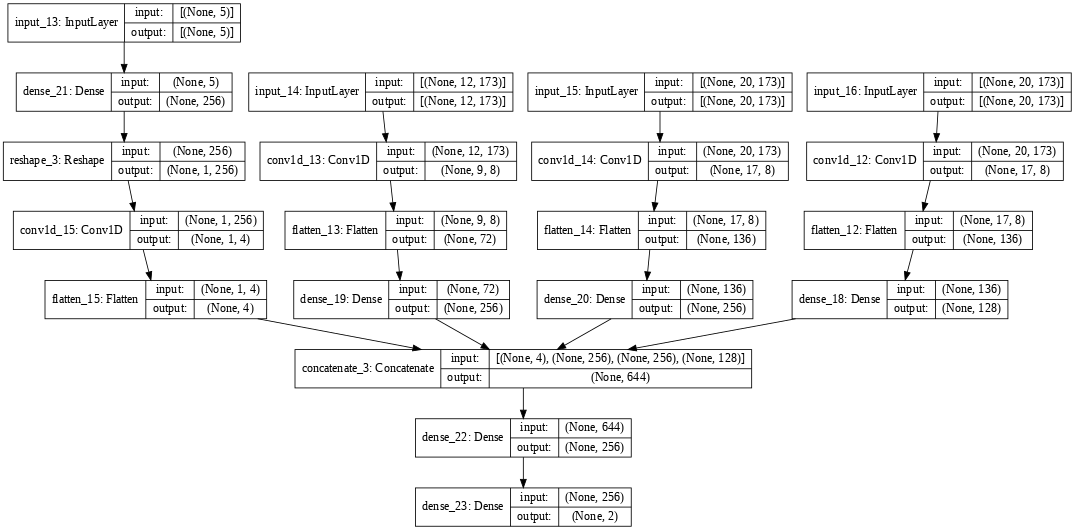

In [ ]:
plot_model(modelnew, dpi=60, show_shapes=True, show_layer_names=True)

Epoch 1/50
578/578 [==============================] - 5s 7ms/step - loss: 0.6691 - accuracy: 0.5859 - val_loss: 0.5365 - val_accuracy: 0.7471
Epoch 2/50
578/578 [==============================] - 4s 7ms/step - loss: 0.5363 - accuracy: 0.7187 - val_loss: 0.5268 - val_accuracy: 0.7471
Epoch 3/50
578/578 [==============================] - 4s 7ms/step - loss: 0.5126 - accuracy: 0.7498 - val_loss: 0.5316 - val_accuracy: 0.7471
Epoch 4/50
578/578 [==============================] - 4s 7ms/step - loss: 0.4696 - accuracy: 0.7680 - val_loss: 0.5367 - val_accuracy: 0.7237
Epoch 5/50
578/578 [==============================] - 4s 7ms/step - loss: 0.4365 - accuracy: 0.7856 - val_loss: 0.5329 - val_accuracy: 0.7276
Epoch 6/50
578/578 [==============================] - 4s 7ms/step - loss: 0.3984 - accuracy: 0.8095 - val_loss: 0.5274 - val_accuracy: 0.7393
Epoch 7/50
578/578 [==============================] - 4s 7ms/step - loss: 0.3726 - accuracy: 0.8355 - val_loss: 0.5661 - val_accuracy: 0.7354
Epoch 

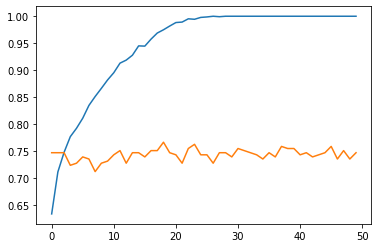

In [ ]:
#Компилируем сеть
modelnew.compile(optimizer=RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Обучаем
history = modelnew.fit((X_train1, X2_train1, X3_train1, X3_train1),
                    Y_train1,
                    epochs = 50,
                    batch_size=4,
                    validation_data=((X_test1, X2_test1, X3_test1, X3_test1), Y_test1))
#Выводим график точности распознавания на обучающей и проверочной выборках
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [ ]:
modelnew.save_weights('/content/drive/MyDrive/pitonism/my_new_model.hdf5')
#modelnew.load_weights('/content/drive/MyDrive/pitonism/my_new_model.hdf5')

###ЧЕРНОВИКИ, ПОДВАЛ И МУСОРКА

In [ ]:
#indexes = range(0,5)
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(5,)))
#model.add(Reshape(1,256))
#model.add(Conv1D (2, 2,  activation='relu'))
#model.add (Flatten ())
#model.add(Dense(925, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(len(DiplomeDrunkBase), activation='softmax'))
#Компилируем сеть
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Обучаем
history = model.fit(X_train1,
                    Y_train1,
                    epochs = 50,
                    batch_size=4,
                    validation_data=(X_test1, Y_test1))
#Выводим график точности распознавания на обучающей и проверочной выборках
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [ ]:
print(model.summary()) 

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 256)               1536      
Total params: 1,536
Trainable params: 1,536
Non-trainable params: 0
_________________________________________________________________
None


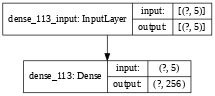

In [ ]:
plot_model(model, dpi=50, show_shapes=True, show_layer_names=True)

In [ ]:
indexes

range(0, 5)

In [ ]:
indexes = range(0,37)

#Создаём полносвязанную сеть 
model = Sequential()


model.add(Dense(256, activation='relu', input_shape=(len(indexes),)))

model.add(Conv1D (128, 20, activation='relu' ) )

model.add(Dense(64, activation='relu'))
BatchNormalization
Dropout (0.2)
#model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
#В конце количество нейронов равно количеству классов и softmax
model.add(Dense(len(DiplomeDrunkBase), activation='softmax'))
model.add(Dense(2, activation='relu'))
#Компилируем сеть
model.compile(optimizer=Adam(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Обучаем
history = model.fit(X_train[:, indexes],
                    y_train,
                    epochs = 1000,
                    batch_size=15,
                    validation_data=(X_test[:, indexes], y_test))

#Выводим график точности распознавания на обучающей и проверочной выборках
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [ ]:
model.summary()

In [ ]:
#Выбираем голос для распознавания
songname = '/content/drive/MyDrive/pitonism/TestExamles/Sober.m4a'
#Получаем аудио сигнал
y, sr = librosa.load(songname, mono=True, duration= (10))
y = y[2*sr:6*sr]
#Параметризуем сигнал
out = get_features(y, sr)

In [ ]:
out= np.array(out)

In [ ]:
print(out.shape)

(1, 3)


In [ ]:
out = np.array(out).reshape(1,-1)

In [ ]:
out = scaler.transform(out)

ValueError: ignored

In [ ]:
print(out)

[[-0.90563813  1.08071684 -0.70828545  0.70666808  1.75769718]]


In [ ]:
out0 = np.array(out[0])
out1 = np.array(out[1])
out2 = np.array(out[2])

In [ ]:
out0 = out0.reshape(1,-1)
out1 = out1.reshape(1,12,-1)
out2 = out2.reshape(1,20,-1)

In [ ]:
y = modelnew.predict([out0,out1,out2])

In [ ]:
#Выводим выход с softmax
print(y)
#И распознанный класс
print(np.argmax(y))
#Проверяем правильный индекс исходной группы
print(DiplomeDrunkBase.index("basedrunk"))

[[0. 1.]]
1
0


### РАСПОЗНАВАНИЕ СОСТОЯНИЯ

In [ ]:
songname = '/content/drive/MyDrive/pitonism/DiplomeDrunkBase/mybasesober/soberer (1).wav'
out1 = []
out2 = []
out3 = []

y, sr = librosa.load(songname, mono=True)
#y = y[1000*sr:1004*sr]
curr_time = time.time()    
for j in range (int(len(y)//sr-4)):   

     #Превращаем сигнал в параметризованные данные
     #out, chroma_stft, mfcc = get_features(y, sr)
     out, chroma_stft, mfcc = get_features(y[j*sr:(j+4)*sr], sr)
     #Добавляем строку в X_train
     out1.append(out)
     out2.append(chroma_stft)
     out3.append(mfcc)
     #Добавляем в Y_train номер жанра в формате ohe
      #Y_train.append(utils.to_categorical(i, len(DiplomeDrunkBase)))
out1 = np.array(out1)
out2 = np.array(out2)
out3 = np.array(out3)
#Выводим информацию о готовности обработки базы
print("Состояние ", songname, " готов -> ", round(time.time() - curr_time), "c", sep="")

Состояние /content/drive/MyDrive/pitonism/DiplomeDrunkBase/mybasesober/soberer (1).wav готов -> 2c


In [ ]:
out1  =  np.array(out1/np.max(out1))
out2 =  np.array(out2/np.max(out2))
out3 =  np.array(out3/np.max(out3))
y = modelnew.predict([out1,out2,out3,out3])


In [ ]:
y

array([[1.0000000e+00, 1.5077879e-13],
       [4.7829835e-28, 1.0000000e+00],
       [8.4341403e-19, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.1273098e-09],
       [5.3060703e-27, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [2.7159795e-01, 7.2840208e-01],
       [1.3932800e-16, 1.0000000e+00],
       [8.8365318e-04, 9.9911636e-01],
       [3.9116787e-25, 1.0000000e+00],
       [1.0577104e-07, 9.9999988e-01],
       [6.1084148e-07, 9.9999940e-01],
       [1.1235470e-20, 1.0000000e+00],
       [9.0122454e-10, 1.0000000e+00],
       [1.2353308e-36, 1.0000000e+00],
       [1.0000000e+00, 7.7108211e-24],
       [6.1708021e-21, 1.0000000e+00],
       [1.0000000e+00, 8.3166742e-24],
       [5.8924041e-07, 9.9999940e-01],
       [9.9962556e-01, 3.7445794e-04],
       [9.8527764e-09, 1.0000000e+00],
       [9.9999857e-01, 1.4541901e-06],
       [2.5290479e-19, 1.0000000e+00],
       [2.3272483e-11, 1.0000000e+00],
       [1.5014003e-16, 1.

In [ ]:
#Выводим выход с softmax
print ('  НЕТРЕЗВЫЙ    ТРЕЗВЫЙ')
yl,yr = np.split(y, [1], axis=1)
#И распознанный класс
print(np.mean(yl),'      ',np.mean(yr))

  НЕТРЕЗВЫЙ    ТРЕЗВЫЙ
0.24123488        0.7587651
